<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/regression_and_characterization/peak_finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding peaks:


https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

Find peaks inside a signal based on peak properties.

This function takes a 1-D array and finds all local maxima by simple comparison of neighboring values. Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties.

     |████████████████████████████████| 77 kB 3.1 MB/s 


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


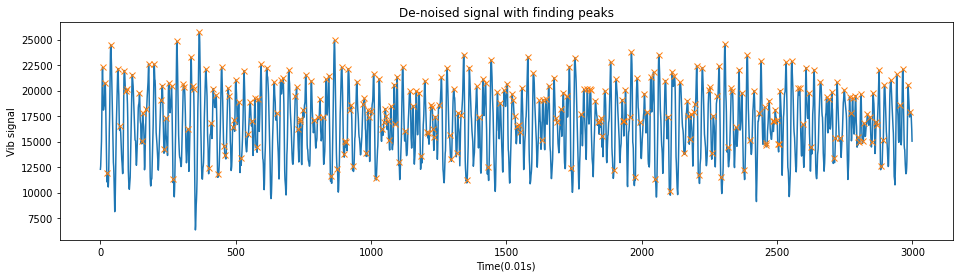

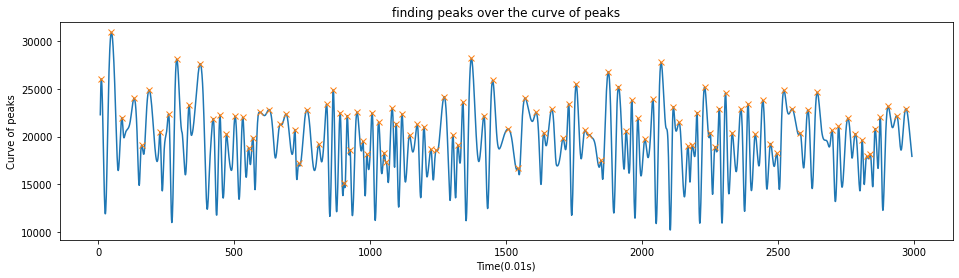

In [ ]:
!pip3 install influxdb
import numpy as np
import csv
import matplotlib.pyplot as plt
import pywt
from influxdb import InfluxDBClient
import operator
import scipy.signal as sg
import scipy as sp

ip = "sensorweb.us" 
unit = "b8:27:eb:97:f5:ac" # BedJ
stampIni = "2020-08-17T05:27:00.000000Z"
stampEnd = "2020-08-17T05:27:30.000000Z"
client = InfluxDBClient(ip, "8086", "test", "sensorweb", "shake", True)

query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '
result = client.query(query)
points = list(result.get_points())
values =  map(operator.itemgetter('value'), points)
times  =  map(operator.itemgetter('time'),  points)
data = np.array(list(values))
fs = 100 # for vibration data

####### peak detection
x = data
peaks1, _ = sp.signal.find_peaks(x, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
plt.ylabel('Vib signal')
plt.title("De-noised signal with finding peaks")
plt.plot(x)
plt.plot(peaks1, x[peaks1], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

values = np.zeros((1,len(peaks1)))
cValues = 0;
for val in peaks1:
      values[0,cValues] = x[val]
      cValues = cValues + 1
values = values.ravel()

xvals = np.linspace(0, 3000, 3000)
x2 = sp.interpolate.interp1d(peaks1,values, kind='cubic',bounds_error=False)(xvals)
peaks2, _ = sg.find_peaks(x2, height=0)

plt.figure(figsize=(16, 4))
plt.xlabel('Time(0.01s)')
plt.ylabel('Curve of peaks')
plt.title("finding peaks over the curve of peaks")
plt.plot(x2)
plt.plot(peaks2, x2[peaks2], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()